<a href="https://colab.research.google.com/github/Rahafhosari/DataScience2024-2025/blob/master/ds_fundamentals_exam_rahaf_hosari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Employee Attrition
---
The dataset explores Attrition across different Department (HR, R&D, or Sales) and multiple factors

*Name : Rahaf Hosari*

## Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Imports

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [3]:
url='/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week04/Data/DS Fundamentals Exam/Mod_employee_attrition - Temp employee_attrition.csv'
df = pd.read_csv(url)

#### Summary of Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1475 non-null   int64 
 1   Attrition                 1475 non-null   object
 2   BusinessTravel            1475 non-null   object
 3   Department                1475 non-null   object
 4   DistanceFromHome          1475 non-null   int64 
 5   Education                 1475 non-null   int64 
 6   EducationField            1475 non-null   object
 7   EmployeeCount             1475 non-null   int64 
 8   EmployeeNumber            1475 non-null   int64 
 9   EnvironmentSatisfaction   1475 non-null   int64 
 10  Gender                    590 non-null    object
 11  HourlyRate                1475 non-null   object
 12  JobInvolvement            1475 non-null   int64 
 13  JobLevel                  1475 non-null   int64 
 14  JobRole                 

#### First 5 rows

In [50]:
pd.set_option("display.max_columns", None)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,DailyRate,WeeklyRate,YearlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,752,3760,195520,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,1,3,NaN,61,2,2,Research Scientist,2,Married,488,2440,126880,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,2,Other,1,4,NaN,92,2,1,Laboratory Technician,3,Single,736,3680,191360,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,448,2240,116480,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,Research & Development,2,1,Medical Sciences,1,1,NaN,40,3,1,Laboratory Technician,2,Married,320,1600,83200,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


#### Data Types

In [6]:
# df.dtypes



```
By obesriving the data types above against the datatypes in the Dictionart:
1- 'Hourly Rate' should be integer
2- 'Years at Company' should be integer indication number of years at the company
```



##Data Cleaning

Ensure all columns match the data types listed in the data dictionary.
### Convert Data Types

#### HourlyRate Column

In [7]:
df['HourlyRate'] = df['HourlyRate'].astype(int)

ValueError: invalid literal for int() with base 10: '94_'

Replace '_' with empty string

In [8]:
#Observing Value counts
df['HourlyRate'].value_counts(dropna=False)

,count
HourlyRate,
66,29
98,28
42,28
84,28
48,28
...,...
53,14
68,14
38,13


In [9]:
df['HourlyRate'] = df['HourlyRate'].str.replace("_",'')

After Solving Issue, try to change data type again

In [10]:
df['HourlyRate'] = df['HourlyRate'].astype(int)

Make sure of change by checking Data types again

In [11]:
df['HourlyRate'].dtype

dtype('int64')

#### YearsAtCompany Column

In [12]:
df['YearsAtCompany'].value_counts(dropna=False)
#A quick look on the data values

,count
YearsAtCompany,
5,196
1,173
3,128
2,128
10,120
4,110
7,90
9,82
8,80


In [13]:
df['YearsAtCompany'] = df['YearsAtCompany'].astype(float)

ValueError: could not convert string to float: '5!'

In [14]:
df['YearsAtCompany'] = df['YearsAtCompany'].str.replace("!",'')
df['YearsAtCompany'] = df['YearsAtCompany'].astype(int)

In [15]:
df['YearsAtCompany'].dtype

dtype('int64')

Identify and address any inconsistencies in categorical values (example: cat, Cat, cats)
### Inconsistency

Check other columns for inconsistensy



```
Check and Overview of all Values in Columns
```



In [16]:
# Select all columns
all_columns = df.columns

# loop through the list of string columns
for column in all_columns:
  # print the value counts for the column
  count =  df[column].value_counts()
  print(f"Value counts for {column} : {count}")
  print()

Value counts for Age : Age
35     78
34     78
36     69
31     69
29     68
32     62
30     60
38     59
33     58
40     57
37     50
27     48
28     48
42     46
39     42
45     41
41     40
26     39
44     34
46     33
43     32
50     30
25     26
24     26
49     24
47     24
55     22
53     19
48     19
51     19
52     18
54     18
22     16
58     14
23     14
56     14
21     13
20     11
59     10
19      9
18      8
60      5
57      4
578     1
Name: count, dtype: int64

Value counts for Attrition : Attrition
No     1238
Yes     237
Name: count, dtype: int64

Value counts for BusinessTravel : BusinessTravel
Travel_Rarely        1048
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Value counts for Department : Department
Research & Development    964
Sales                     448
Human Resources            63
Name: count, dtype: int64

Value counts for DistanceFromHome : DistanceFromHome
2     212
1     208
10     86
9      86
7      85
3

#### Object Columns

In [17]:
# Select all columns
categorial_cols = df.select_dtypes(include='object').columns
categorial_cols.values


array(['Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype=object)

In [18]:
categorial_cols.size

9

In [19]:
# loop through the list of string columns
for column in categorial_cols:
  # print the value counts for the column
  count =  df[column].value_counts()
  print(f"Value counts for {column} : {count}")
  print()

Value counts for Attrition : Attrition
No     1238
Yes     237
Name: count, dtype: int64

Value counts for BusinessTravel : BusinessTravel
Travel_Rarely        1048
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Value counts for Department : Department
Research & Development    964
Sales                     448
Human Resources            63
Name: count, dtype: int64

Value counts for EducationField : EducationField
Life Sciences       607
Medical             467
Marketing           160
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

Value counts for Gender : Gender
Female    590
Name: count, dtype: int64

Value counts for JobRole : JobRole
Sales Executive              328
Research Scientist           293
Laboratory Technician        260
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             81
Human

By observing the data description in the Dictionary, the following vlaues will have to be adjusted:
- Educational Field column:
Medical --> Medical Sciences &&
Technical Degree --> Technical
-JobRole:
Manufacturing Director --> Managing Director



#### Numeric Columns

In [20]:
# Select all columns
numeric_cols = df.select_dtypes('number').columns
numeric_cols.values


array(['Age', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'DailyRate',
       'WeeklyRate', 'YearlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'], dtype=object)

In [21]:
numeric_cols.size

26

In [23]:
# loop through the list of string columns
for column in numeric_cols:
  # print the value counts for the column
  count =  df[column].value_counts().sort_values(ascending=False)
  print(f"Value counts for {column} : {count}")
  print()

Value counts for Age : Age
35     78
34     78
36     69
31     69
29     68
32     62
30     60
38     59
33     58
40     57
37     50
28     48
27     48
42     46
39     42
45     41
41     40
26     39
44     34
46     33
43     32
50     30
24     26
25     26
49     24
47     24
55     22
53     19
48     19
51     19
52     18
54     18
22     16
56     14
23     14
58     14
21     13
20     11
59     10
19      9
18      8
60      5
57      4
578     1
Name: count, dtype: int64

Value counts for DistanceFromHome : DistanceFromHome
2     212
1     208
10     86
9      86
7      85
3      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
29     27
23     27
15     26
18     26
26     25
25     25
20     25
19     23
28     23
14     21
12     20
17     20
13     20
22     19
21     18
27     12
Name: count, dtype: int64

Value counts for Education : Education
3    574
4    399
2    284
1    170
5     48
Name: count, dtype: int64

Value counts for Employee

- Value counts for EmployeeCount : EmployeeCount value of
1  total count of this occurence is 1475
Only has one value (This column to be dropped)

- EmployeeNumber doesn't exist in the dictionary and has non unique values

- JobLevel No describtion in the dictionary about JobLevel rankings
- Performance Rating has missing Rating: 1 = 'Low'; 2 = 'Good';
- StockOptionLevel Missing elaboration in the dictionary about values (0,1,2,3)

#### Solving Inconsistency in Values

In [32]:
df['EducationField'] = df['EducationField'].replace(to_replace='Technical Degree',value="Technical")
df['EducationField'] = df['EducationField'].replace(to_replace='Medical',value="Medical Sciences")
df['EducationField'].value_counts()

,count
EducationField,
Life Sciences,607
Medical Sciences,467
Marketing,160
Technical,132
Other,82
Human Resources,27


In [29]:
df['JobRole'] = df['JobRole'].replace(to_replace='Manufacturing Director',value="Managing Director")
df['JobRole'].value_counts()

,count
JobRole,
Sales Executive,328
Research Scientist,293
Laboratory Technician,260
Managing Director,145
Healthcare Representative,131
Manager,102
Sales Representative,83
Research Director,81
Human Resources,52


In [190]:
# Drop the 'EmployeeCount' column
#The column only has one value which is 1, this value doesn't necessarily represent any useful information
#and can be dropped.
df = df.drop('EmployeeCount', axis=1)

In [195]:
#Dropping Standard Hours Column as it's the same value for the whole dataset.
df = df.drop('StandardHours', axis=1)


### Duplicates
Identify and address any duplicate values.

In [33]:
duplicated_rows = df.duplicated()
duplicated_rows.sum()

5

In [34]:
df[duplicated_rows]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
14,34,No,Travel_Rarely,Research & Development,19,2,Medical Sciences,1,18,2,...,3,80,1,3,2,3,2,2,1,2
159,58,No,Travel_Rarely,Research & Development,9,3,Medical Sciences,1,214,2,...,2,80,1,9,3,2,1,0,0,0
625,32,No,Travel_Rarely,Sales,13,4,Life Sciences,1,859,2,...,3,80,1,8,3,2,5,2,0,3
815,38,No,Travel_Rarely,Sales,2,2,Marketing,1,1125,4,...,3,80,0,10,2,3,1,0,0,0
1145,44,No,Travel_Rarely,Research & Development,7,3,Medical Sciences,1,1608,2,...,4,80,1,23,4,2,22,7,1,10


#### Drop Duplicated

In [37]:
df = df.drop_duplicates()
df.duplicated().sum()

0



```
No more duplicate Values
```



### Indexing

Check which Column has 100% Unique Values

In [41]:
((df.nunique()/len(df))*100).sort_values(ascending=False)

,0
EmployeeNumber,100.000000
DailyRate,4.829932
YearlyRate,4.829932
WeeklyRate,4.829932
HourlyRate,4.829932
Age,2.993197
TotalWorkingYears,2.721088
YearsAtCompany,2.517007
DistanceFromHome,1.972789
YearsInCurrentRole,1.292517


As it can be seen from precentages the EmployeeNumber has 100% unique values therefore it can be chosen as an index.

In [42]:
df = df.set_index("EmployeeNumber")

In [43]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,1,3,NaN,...,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,2,Other,1,4,NaN,...,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,1,4,Female,...,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,Research & Development,2,1,Medical Sciences,1,1,NaN,...,4,80,1,6,3,3,2,2,2,2


### Missing Values
- Identify and address any missing values in this dataset. Fill in missing values with a placeholder appropriate for the data type.
- Identify and address any inappropriate or unusual data points (example: age cannot be 325)

### Pre-Analysis:
From Previous Data values count inspection There exist missing Data in:
1. Gender --> Male
2. Over18 --> No

There's no Male in Gender Column only Females.

In [53]:
#Find Sum of Missing Values exclude all sums of 0, where there's no missing values.
null_sums = df.isna().sum()[df.isna().sum() > 0]
null_sums

,0
Gender,882


In [54]:
#Percentage of Missing Data in the Gender Column
null_percentages = null_sums/len(df) * 100
null_percentages

,0
Gender,60.0




```
Percentage of Missing Values = 60%. There is 882 Missing value in the Gender Column from a Total of 1475 row.
Only 593 (40%) value of Gender are filled with Female.
```



<Axes: >

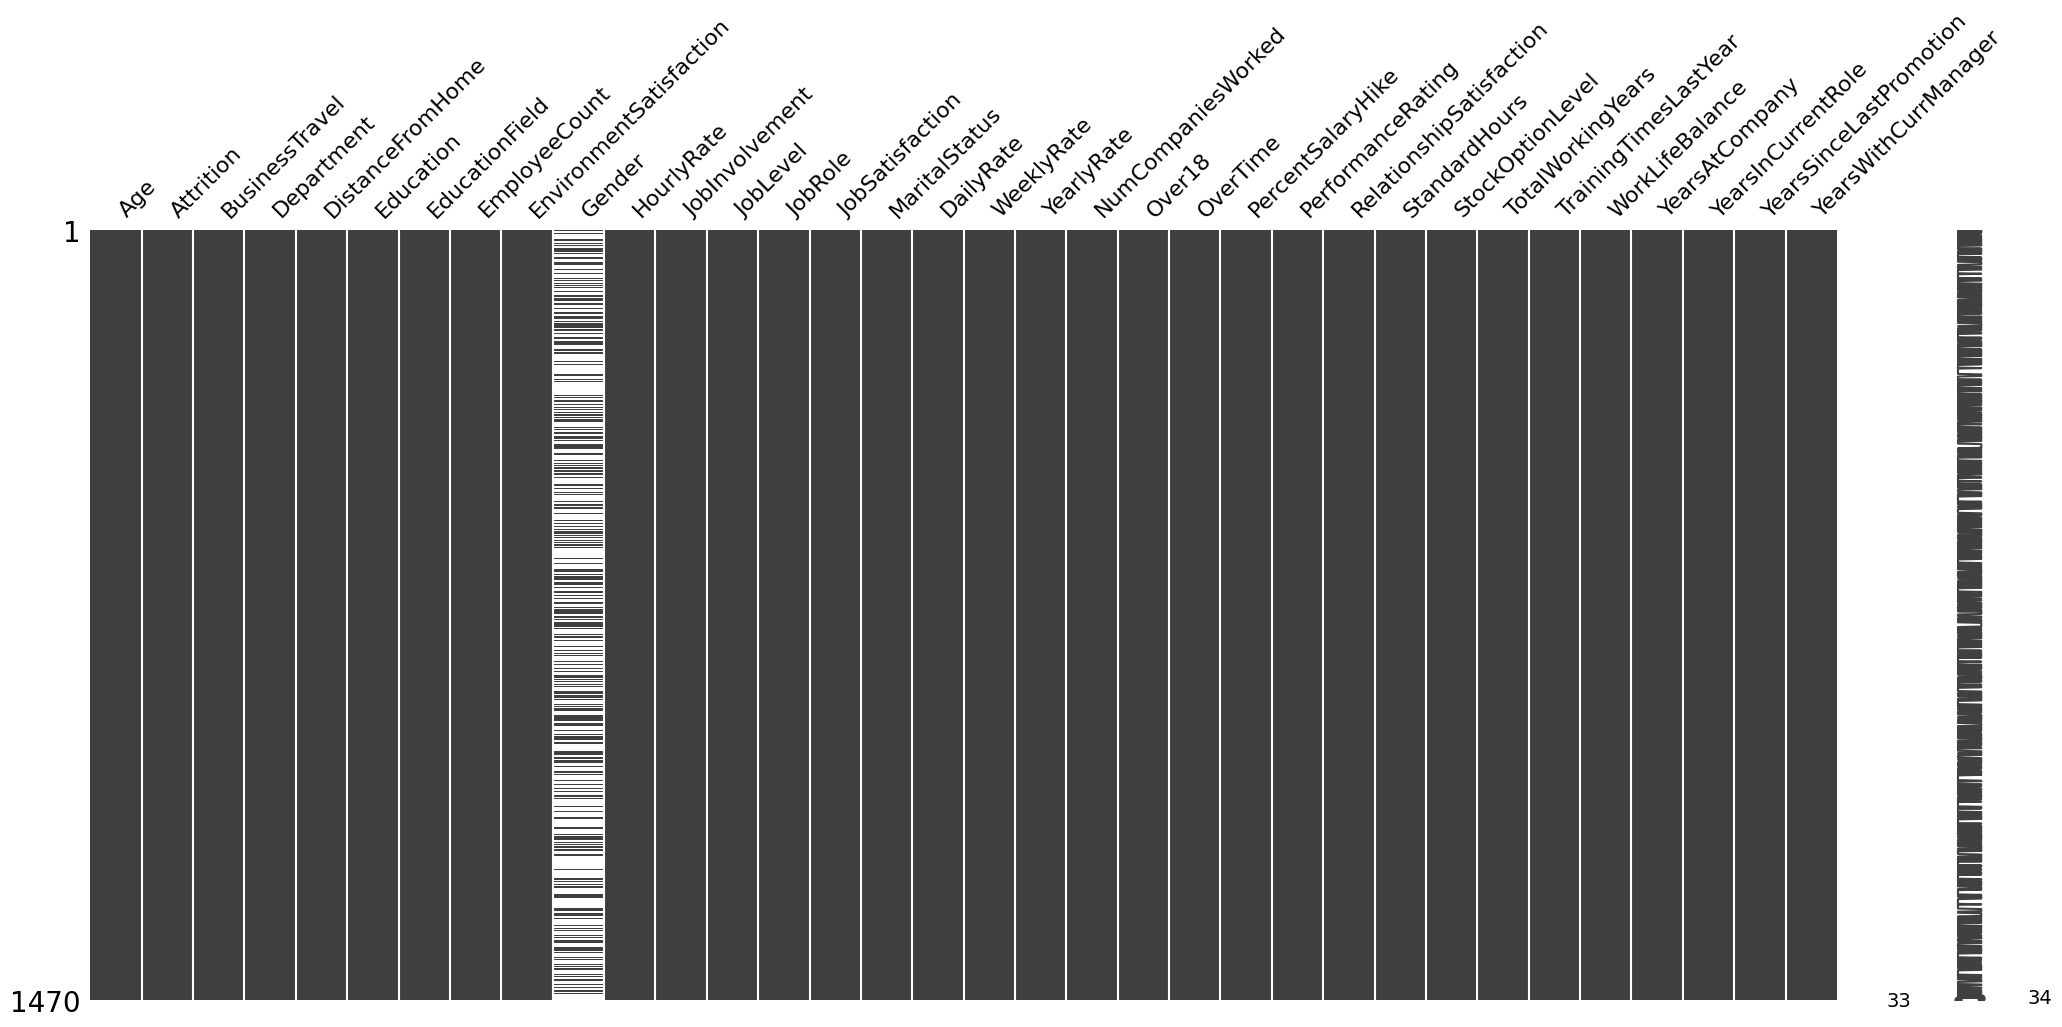

In [48]:
# Visualize the missing values using the missingno package's matrix plot.
msno.matrix(df)

#### Gender Missing Values

In [55]:
#the rows where Gender is Missing
df[df['Gender'].isna()]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,DailyRate,WeeklyRate,YearlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,1,3,NaN,61,2,2,Research Scientist,2,Married,488,2440,126880,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,2,Other,1,4,NaN,92,2,1,Laboratory Technician,3,Single,736,3680,191360,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
7,27,No,Travel_Rarely,Research & Development,2,1,Medical Sciences,1,1,NaN,40,3,1,Laboratory Technician,2,Married,320,1600,83200,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
8,32,No,Travel_Frequently,Research & Development,2,2,Life Sciences,1,4,NaN,79,3,1,Laboratory Technician,4,Single,632,3160,164320,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
11,30,No,Travel_Rarely,Research & Development,24,1,Life Sciences,1,4,NaN,67,3,1,Laboratory Technician,3,Divorced,536,2680,139360,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,2,Medical Sciences,1,3,NaN,41,4,2,Laboratory Technician,4,Married,328,1640,85280,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
2062,39,No,Travel_Rarely,Research & Development,6,1,Medical Sciences,1,4,NaN,42,2,3,Healthcare Representative,1,Married,336,1680,87360,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,1,2,NaN,87,4,2,Managing Director,2,Married,696,3480,180960,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3


#### Imputation of Data
There are multiple option:
1. Impute missing values of the 60% with Male value. This will maintain the overall consistensy of the data. Then we can determine trends between Males and Females.

2. Keep Gender values as is, and visualize the trends of Attrition regardless of Gender.

3. Drop rows where Gender is not defined. Nevertheless since the rows with missing gender represents 60% of the data, this choice will not be executed.


In [56]:
#This to be executed if
df['Gender'] = df['Gender'].fillna('Male')

In [57]:
#Checking if there's missing values still
df['Gender'].isna().sum()

0

<Axes: >

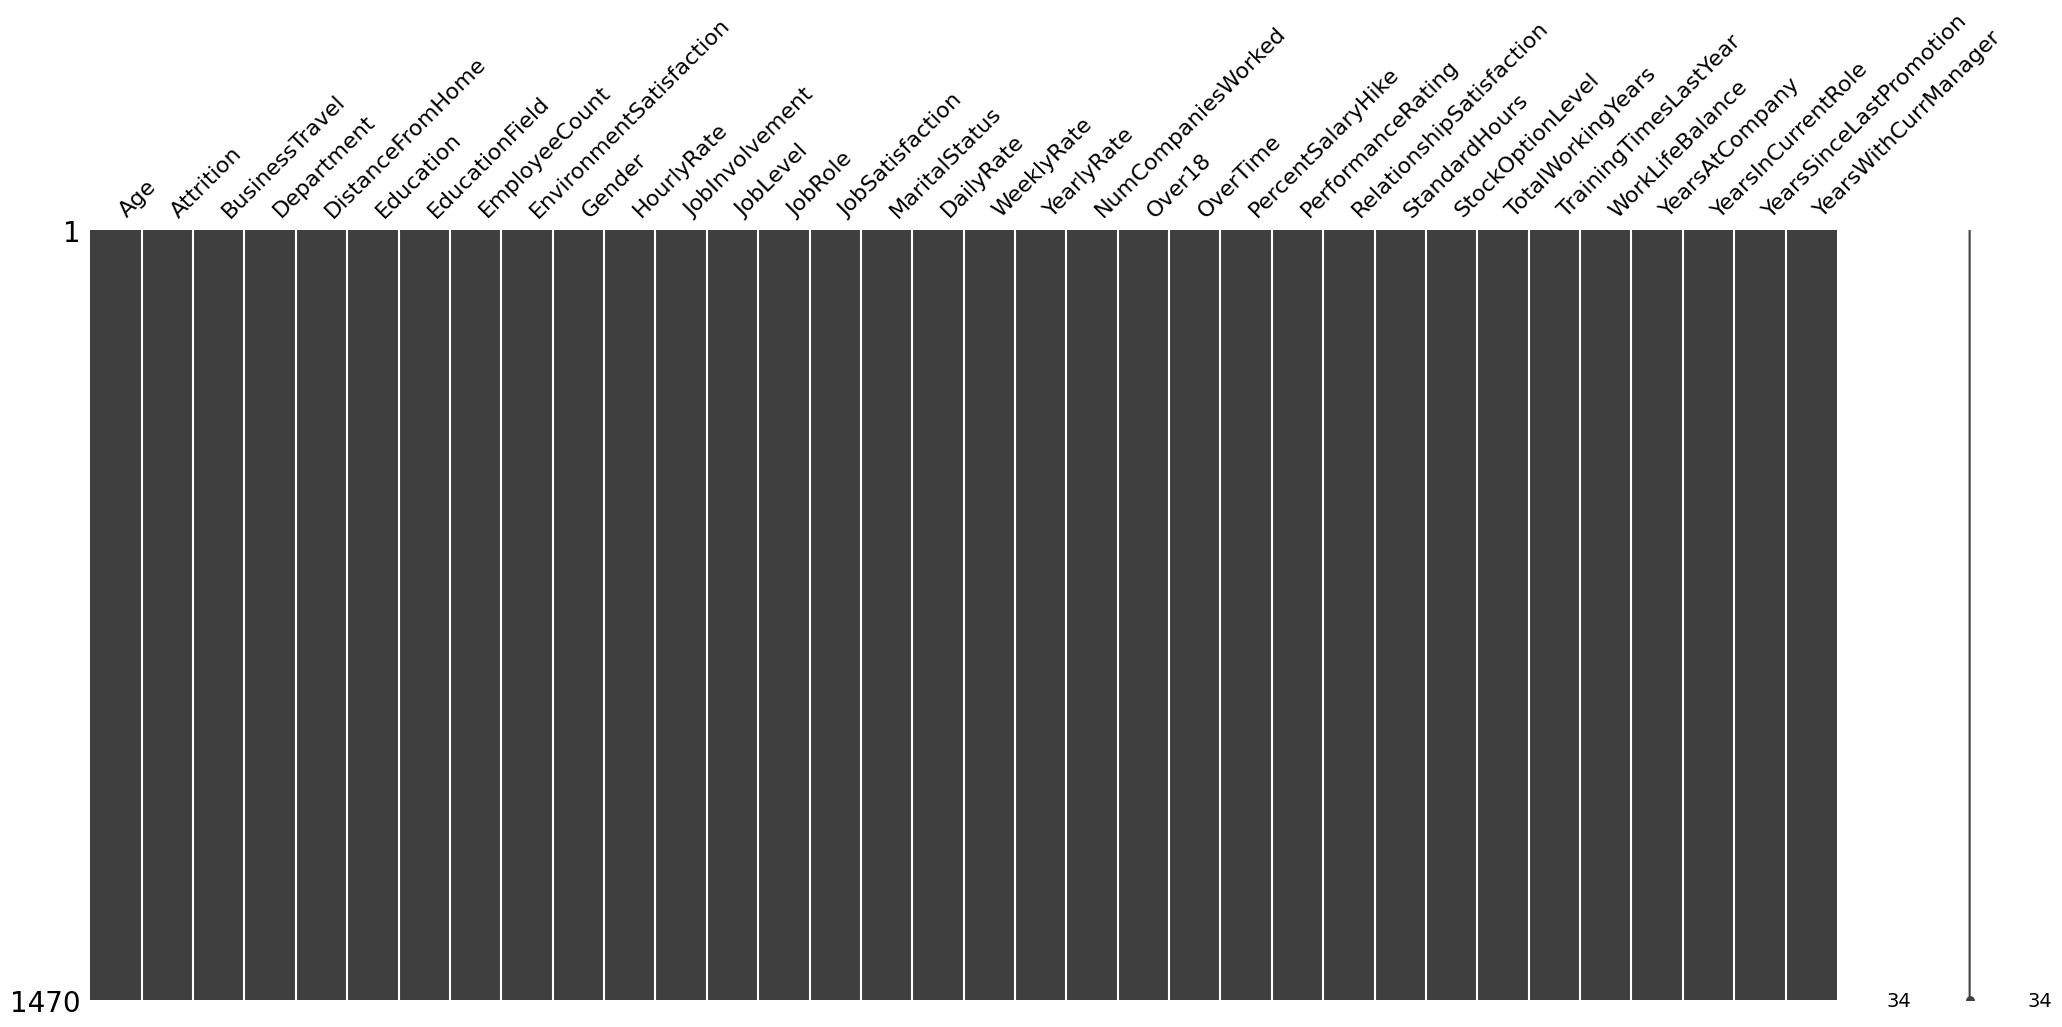

In [60]:
#Visualize Again to confirm if any other data might be missing
msno.matrix(df)

### Save Cleaned Data

In [196]:
fpath_out = "/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week04/Data/DS Fundamentals Exam/Mod_employee_attrition - Temp employee_attrition.csv"

# Use to_csv to save the dataframe using the filename
df.to_csv(fpath_out, index=True)

In [197]:
saved = pd.read_csv(fpath_out)
# Display the info summary.
saved.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            1470 non-null   int64  
 1   Age                       1470 non-null   float64
 2   Attrition                 1470 non-null   object 
 3   BusinessTravel            1470 non-null   object 
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   object 
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole                   1470 non-null   object 
 14  JobSatis

# Data Visualization
---
- Two different types of univariate exploratory visualizations. Each visualization must include a brief interpretation within the code file.
- Two different types of multivariate exploratory visualizations. Each visualization must include a brief interpretation within the code file.

Explore the following:
- Attrition Rate = Number of Attritions/Average Number of Employees x 100
- the rate of attrition varies across industries,departments,jobLevels

In [ ]:
#Palettes
# palette = sns.color_palette("vlag", as_cmap=True)
# palette = sns.color_palette("cubehelix", as_cmap=True)
# palette = {0:"blue",1:"pink"}
# palette = sns.color_palette("coolwarm", as_cmap=True)

In [209]:
attrition = df[df['Attrition'] == 'Yes']
attrition_count= len(attrition)
num_employees = len(df)
attrition_rate = (attrition_count/num_employees)*100
round(attrition_rate,2)

16.12

### Univariate

#### Attrition Count

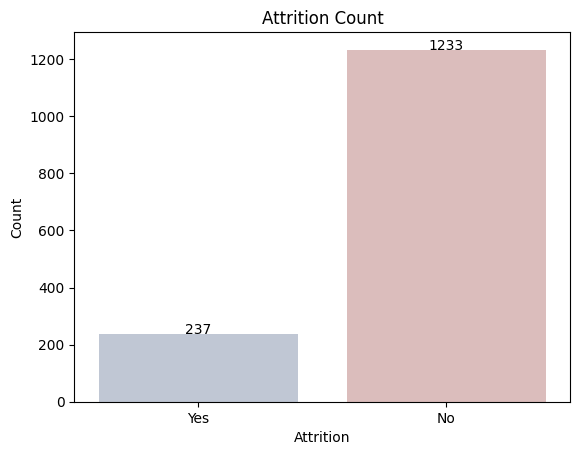

In [86]:
ax = sns.countplot(data=df, x="Attrition",hue="Attrition",palette="vlag")
ax.set_title("Attrition Count")
ax.set_xlabel("Attrition")
ax.set_ylabel("Count")

#Annotate the count on the Graph
for bar in ax.patches:
    #Count
    count = int(bar.get_height())
    ax.annotate(
        f'{count}',  # Text to annotate
        #Postion Top Middle of the Bar
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        #Alignment
        ha='center',
        #Style
        fontsize=10, color='black'
    )

>**The graph represents a Count Plot for the Attritions across the dataset. The x-axis represents the Attriton and the y-axis represents the count.
It can be seen that in this dataset the number of employees attritioned is less than employees not attritioned.**

#### Attrition Grouped By Gender

In [222]:
#Group By Gender
attrition_by_gender = df.groupby(['Gender', 'Attrition'])['Attrition'].count().unstack()
attrition_by_gender.columns = ['No Attrition', 'Attrition']
attrition_by_gender

,No Attrition,Attrition
Gender,,
Female,501,87
Male,732,150


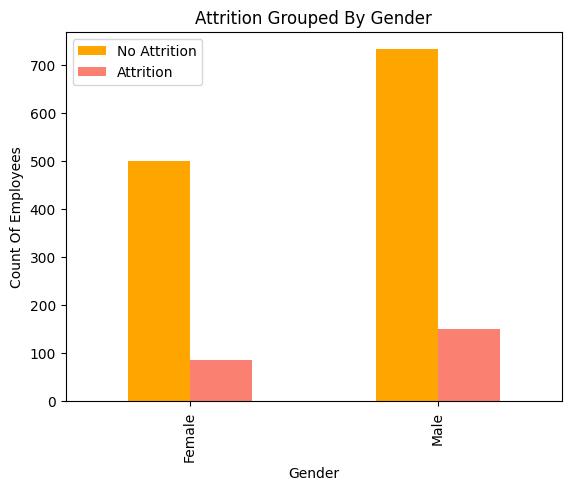

In [233]:
#count Plot of Grouped by Data
ax = attrition_by_gender.plot(kind='bar',color={"orange","salmon"})
ax.set_ylabel("Count Of Employees");
ax.set_xlabel("Gender");
ax.set_title("Attrition Grouped By Gender");

>**The graph represents the count of Attrtion differentiated by Gender. As it can be seen for females, the number of employee females who is attritioned is less than the males. Male attrition is higher that female attrtion.
Overall the number of female employees is less than male employees.**

#### Job Satisfaction

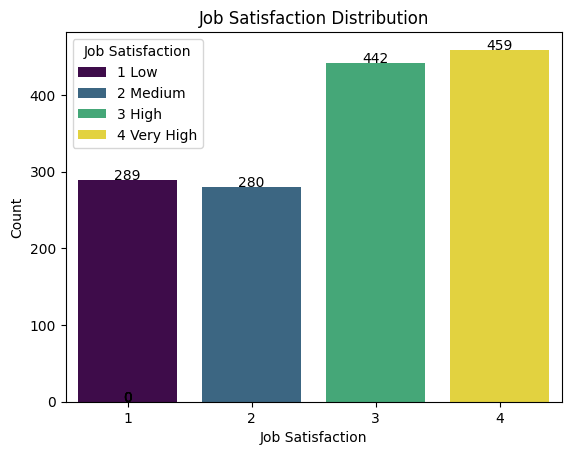

In [117]:
ax = sns.countplot(data=df, x="JobSatisfaction",hue="JobSatisfaction", palette="viridis")
ax.set_title("Job Satisfaction Distribution")
ax.set_xlabel("Job Satisfaction")
ax.set_ylabel("Count")

#Handling Legend Values
legend_labels = ['1 Low', '2 Medium', '3 High', '4 Very High']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, legend_labels, title="Job Satisfaction")

#Annotate Count on Bars
for bar in ax.patches:
    #Count
    count = int(bar.get_height())
    ax.annotate(f'{count}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center',fontsize=10, color='black'
    )

>**The job stasifaction Count plot suggests with Job statisfaction rating in the x-axis and the count on the y-axis, and rank of job satisfaction shown in legend with 1 being the lowest and 4 the highest.
The plot suggest that hat most of the employees have High to Very High Job satisfaction.
Therefore rate of attrition might be less.**

#### Age Distribution

Text(0, 0.5, 'Number of Employees')

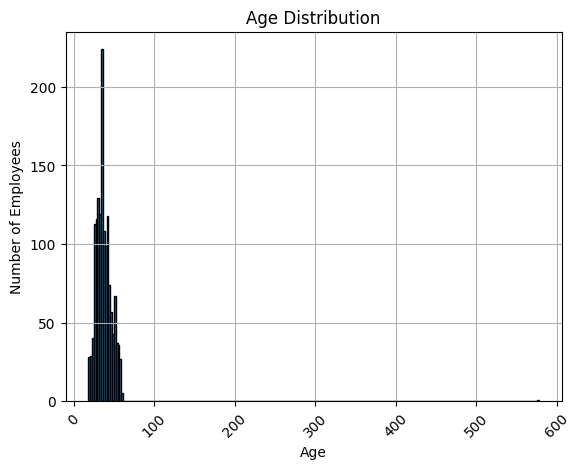

In [91]:
ax = df['Age'].hist(bins ='auto',edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.set_title('Age Distribution')
ax.set_xlabel('Age')
ax.set_ylabel('Number of Employees')

The graph above suggests that there's a value within age that's between 500 and 600.
Looking back at data values for Age, there's one entry with age 578.
Replace this number with Average age.

In [93]:
#Explore the row where this occured
row = df.loc[df['Age'] == 578]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,DailyRate,WeeklyRate,YearlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
131,578,No,Travel_Rarely,Sales,10,4,Medical Sciences,1,4,Male,37,3,4,Sales Executive,3,Single,296,1480,76960,0,Y,No,13,3,3,80,0,38,1,2,37,10,1,8


In [95]:
df['Age'].mean()

36.909712619741775

In [94]:
df.loc[df['Age'] == 578, 'Age'] = df['Age'].mean()

<ipython-input-94-0835b69076ed>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '37.27755102040816' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Age'] == 578, 'Age'] = df['Age'].mean()


Text(0, 0.5, 'Number of Employees')

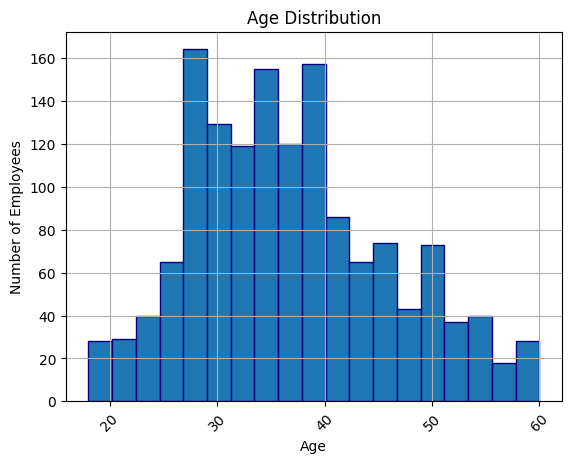

In [98]:
#Distbution again
ax = df['Age'].hist(bins ='auto',edgecolor = 'navy')
ax.tick_params(axis='x', rotation = 45)
ax.set_title('Age Distribution')
ax.set_xlabel('Age')
ax.set_ylabel('Number of Employees')

>**In the initial plot of Age distribution, an outlier and inconsistent value showed. After inspection of value_counts of age, one entry was found to be 578 which is incorrect for age data.
This value was replaced with the average age for the dataset, and thus after redistributing the Age for this dataset is shown to be between 20 and 60. With most employees being between late 20s till 40.**

#### Attrition by Department

In [130]:
attrition_by_department = df.groupby('Department')['Attrition'].value_counts(normalize=True)
attrition_by_department

Department              Attrition
Human Resources         No           0.809524
                        Yes          0.190476
Research & Development  No           0.861602
                        Yes          0.138398
Sales                   No           0.793722
                        Yes          0.206278
Name: proportion, dtype: float64

In [131]:
attrition_by_department_percentage = attrition_by_department.unstack() * 100
attrition_by_department_percentage

Attrition,No,Yes
Department,,
Human Resources,80.952381,19.047619
Research & Development,86.160250,13.839750
Sales,79.372197,20.627803


Text(0, 0.5, 'Number of Employees')

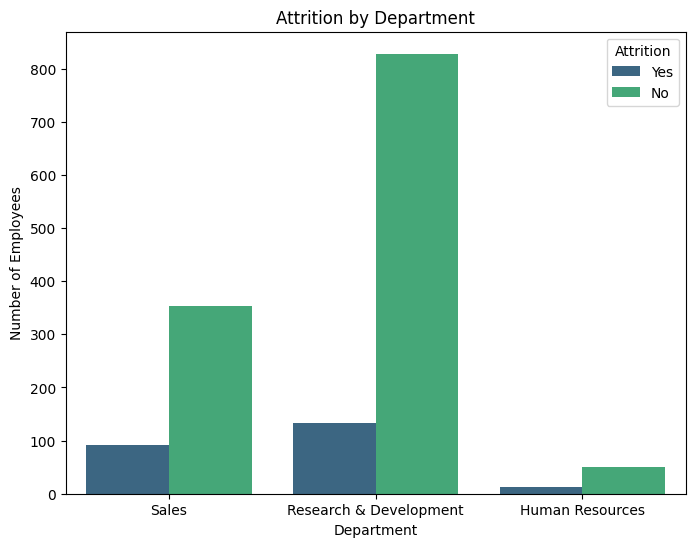

In [136]:
# Visualization of attrition by department
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Department', hue='Attrition', data=df, palette="viridis")
ax.set_title('Attrition by Department')
ax.set_xlabel('Department')
ax.set_ylabel('Number of Employees')



> **The count plot of Attrition based on Departments shows that the Human Resources Department has the lowest number of attritioned employees.**



### Multivariate

#### Age vs. Attrition differentiated by Gender

Text(0, 0.5, 'Age')

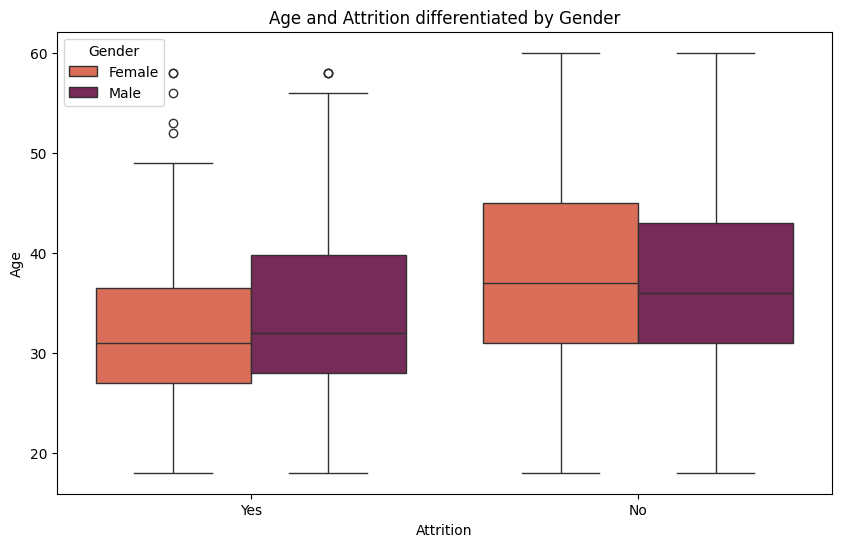

In [248]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Attrition', y='Age', hue='Gender', data=df, palette="rocket_r")
ax.set_title('Age and Attrition differentiated by Gender')
ax.set_xlabel('Attrition')
ax.set_ylabel('Age')

>**The above graph is a box plot of Age on the y-axis and Attrition on the x-axis differentiated by Gender.
The grap shows that female employees who left the company have a median age slightly less than Male employees who left. And the age distribution for males is slightly wider.
In the other hand for females who didn't leave, the age distribution is larger than the one for males.
Between Attrition and No-Attrition it can be seen that the age for No Attiriton is overall higher for both males and females.**

In [156]:
# Calculate the average age for employees who left the company
avg_age_left = df[df['Attrition'] == 'Yes']['Age'].mean().round(2)
print(f"Average age of employees who left: {avg_age_left}")

# Calculate the average age for employees who stayed
avg_age_stayed = df[df['Attrition'] == 'No']['Age'].mean().round(2)
print(f"Average age of employees who stayed: {avg_age_stayed}")

Average age of employees who left: 33.61
Average age of employees who stayed: 37.54


#### HeatMap

Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

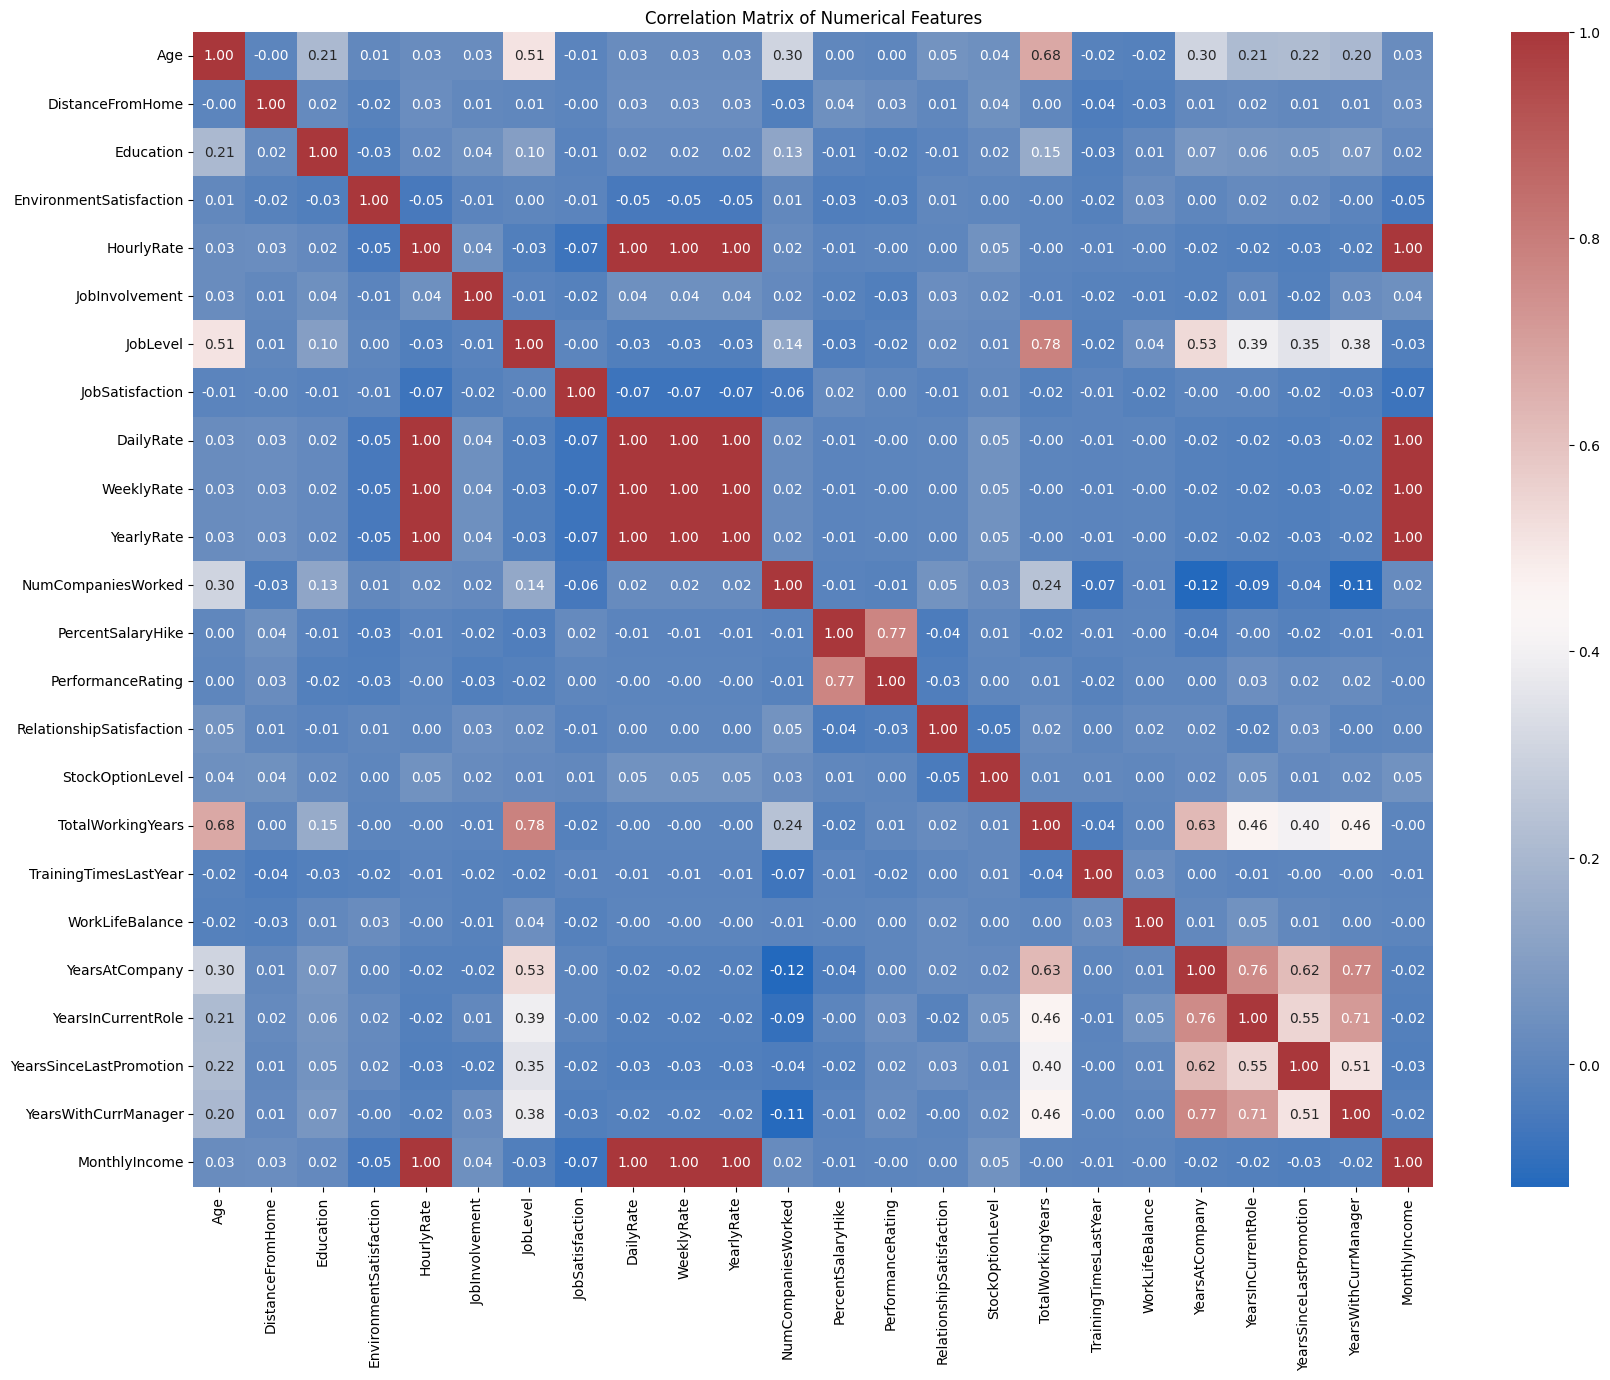

In [198]:
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='vlag',fmt=".2f")
ax.set_title('Correlation Matrix of Numerical Features')

>**The heatmap shows all correlation between all numeric features. The color hue suggests that most features have low to no correlation.
A positive strong correlation coffecient of 0.78  between Total working years and Job Level suggest that the higher the longer the years a person in a job the higher job level he will get. Also with age the older a person gets the longer he stays in a job.
Overall the longer and employee stays in his job,  is affected by how much he/she is promoted, how many years he/she is in this current role and how many years he/she has spent with his current manager**

#### Attrition per job role hued by MaritalStatus

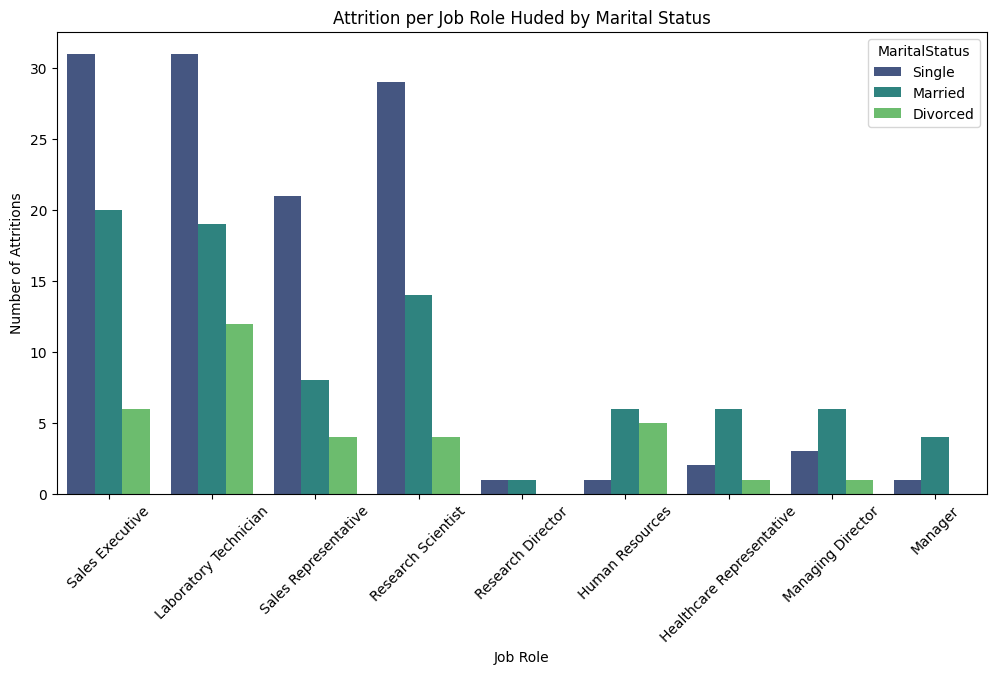

In [236]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='JobRole', hue='MaritalStatus', data=df[df['Attrition'] == 'Yes'], palette="viridis")
ax.set_title('Attrition per Job Role Huded by Marital Status')
ax.set_xlabel('Job Role')
ax.set_ylabel('Number of Attritions')
ax.tick_params(axis='x', rotation=45)

>**From the plot of the different Job roles in the dataset, it's clear that some jobs have higher numbers of employees who left. This can be seen in Sales Executives, Laboratory Technicians, Sales Representatives and Reseach Scientists. Moreover with variations between Marital Status, it's seen that 'Single' employees tend to leave their jobs higher than married or divorced employees.
While for jobs like HR, Managers and Healthcare Representative single employees have less Attrition compared to married employees.**

>**Moreover if we plot the number of employees per Marital Status, it is clearly seen that across all Marital Statuses employees who leave are less than number of employees who stay in their Jobs, and specifically married employees are the most employees who stay in their jobs.**

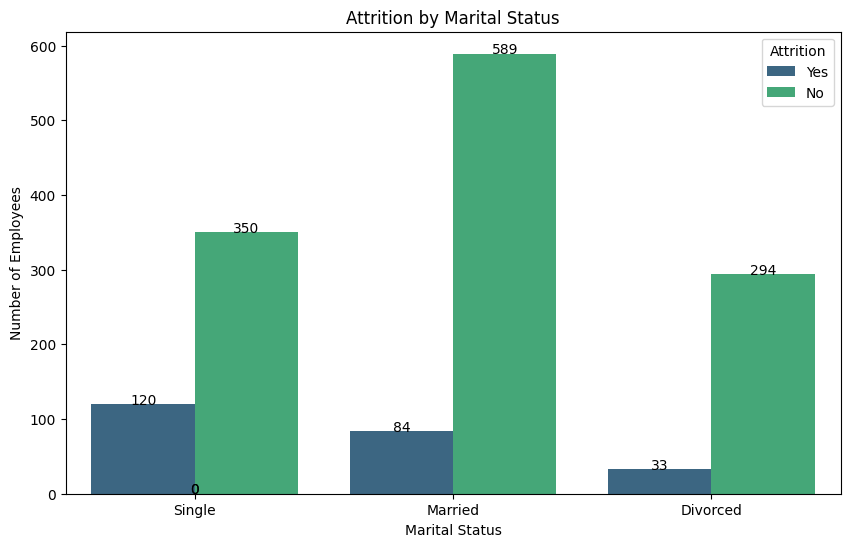

In [253]:
#Attrition by Marital Status
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='MaritalStatus', hue='Attrition', data=df, palette='viridis')
ax.set_title('Attrition by Marital Status')
ax.set_xlabel('Marital Status')
ax.set_ylabel('Number of Employees')

# Annotate the bars with counts
for bar in ax.patches:
    count = int(bar.get_height())
    ax.annotate(f'{count}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center',fontsize=10, color='black'
    )

plt.show()

#### Attrition per job role colored by gender

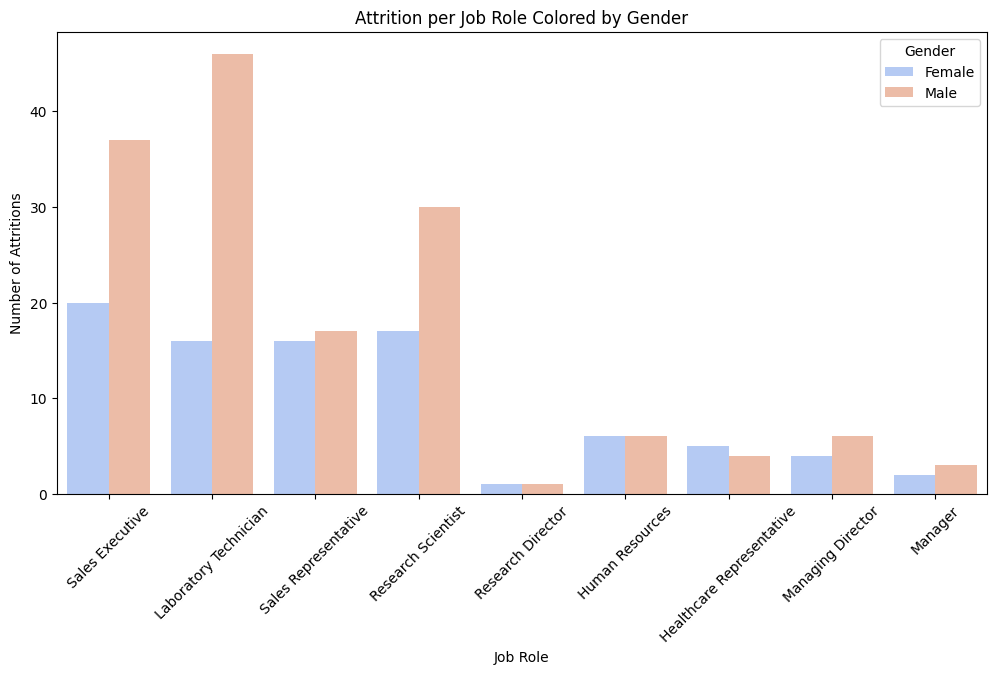

In [256]:
# prompt: Attrition per job role colored by gender

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='JobRole', hue='Gender', data=df[df['Attrition'] == 'Yes'], palette="coolwarm")
ax.set_title('Attrition per Job Role Colored by Gender')
ax.set_xlabel('Job Role')
ax.set_ylabel('Number of Attritions')
ax.tick_params(axis='x', rotation=45)
plt.show()

>**From the plot ove different roles and Number of Attritions, male employees have higher attirition numbers, specifically for certain jobs such Sales Executive, Laboratory Technicians and Reseach Scientists.**

#### Distance from home vs. Attrition differentiates by Job Roles

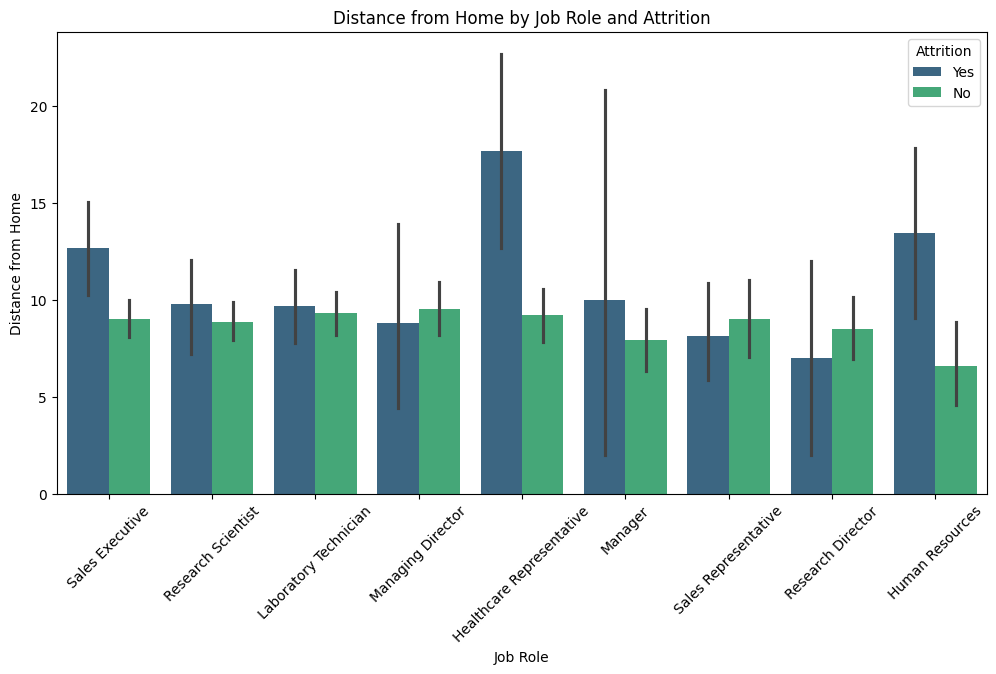

In [179]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='JobRole', y='DistanceFromHome', hue='Attrition', data=df, palette="viridis")
ax.set_title('Distance from Home by Job Role and Attrition')
ax.set_xlabel('Job Role')
ax.set_ylabel('Distance from Home')
ax.tick_params(axis='x', rotation=45)
plt.show()

>**For the box plot above, employees at different jobs tend to have different attiriton numbers in general. Other factors that might contribute to it such the distance from home.
It is seen that Attrition is higher for certain job roles when the average distance from home is higher.**

#### Age vs. Attrition

<ipython-input-259-e5123d5c8d8f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age', y='Attrition', data=df, palette='viridis')


Text(24.000000000000007, 0.5, 'Attrition')

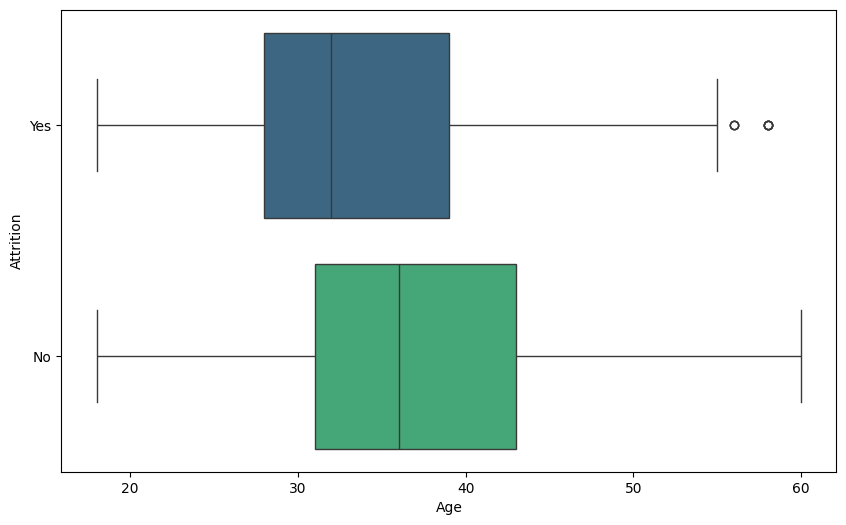

In [259]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Attrition', data=df, palette='viridis')
ax.set_title('Age vs. Attrition')
ax.set_xlabel('Age')
ax.set_ylabel('Attrition')

>**This box plot of age and Attirition, shows that the median Age for people to leave in their jobs is less than the median age for people who stays. This suggest that Attirition is more common among younger groups of employees.**